# Final Data Analysis

Now that the final dataset has been constructed, it's time to do some actual statistical analysis:

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 10)})

Read TAASSC syntactic measures from pickle file:

In [2]:
taassc_measures = pd.read_pickle("data_samples/taassc-measures.pkl")
taassc_measures = taassc_measures.sort_values(["L1", "level_id"])
taassc_measures.head()

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
0,46702,es5,Arabic,3,1.0,19.000000,1.000000,19.000000,0.500000,0.000000
25,9357,dg5,Arabic,3,1.0,10.571429,1.285714,8.222222,0.384615,0.076923
27,39714,eb5,Arabic,3,1.0,14.800000,2.800000,5.285714,0.071429,0.000000
63,38784,eb5,Arabic,3,1.0,5.000000,1.000000,5.000000,1.000000,0.000000
68,31021,ev4,Arabic,3,1.0,11.000000,2.000000,5.500000,0.500000,0.500000


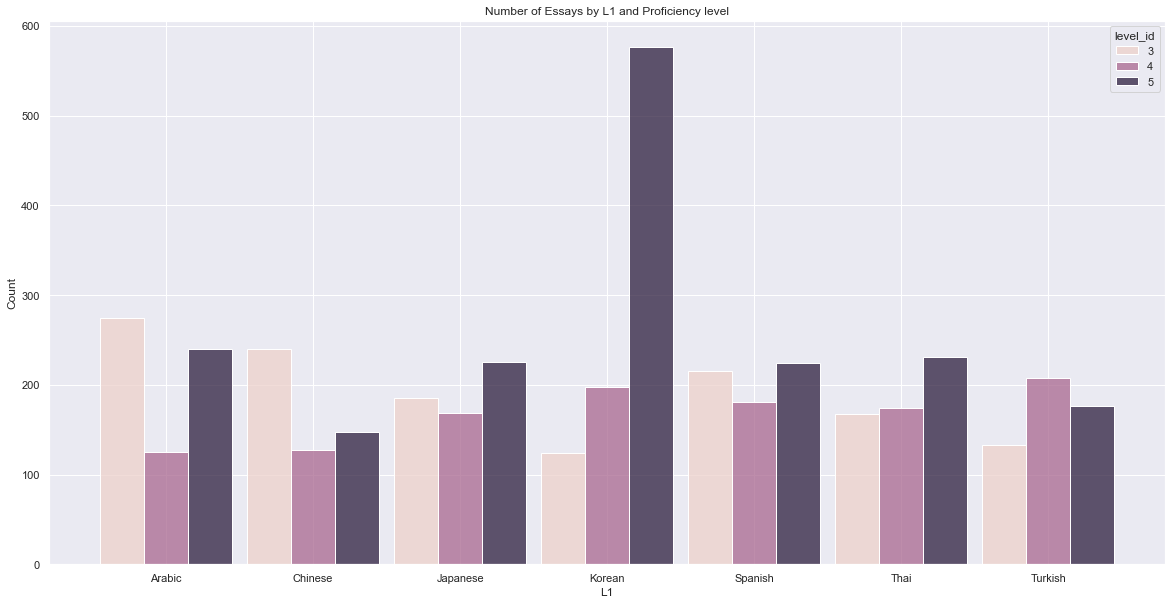

In [3]:
sns.histplot(
    data=taassc_measures,
    x="L1",
    hue="level_id",
    multiple="dodge",
    shrink=0.9
).set(title="Number of Essays by L1 and Proficiency level")
plt.show()

There's a strangely large number of advanced (level 5) Korean essays.
Just to make sure, let's check the number of unique students per L1 by proficiency level:

In [4]:
L1_level_counts = taassc_measures.groupby(["L1", "level_id"])["anon_id"].nunique().reset_index()
L1_level_counts.rename(columns={"anon_id": "count"}, inplace=True)
L1_level_counts

,L1,level_id,count
0,Arabic,3,10
1,Arabic,4,10
2,Arabic,5,10
3,Chinese,3,10
4,Chinese,4,10
5,Chinese,5,10
6,Japanese,3,10
7,Japanese,4,10
8,Japanese,5,10
9,Korean,3,10


Okay, so there's indeed the same number of unique students for every combination of L1 and proficiency level.
Let's plot the average number of essays per user in each group instead:

In [5]:
L1_level_counts["mean_essay_count"] = [
    len(
        taassc_measures[
            (taassc_measures["L1"] == L1_level_counts.iloc[i]["L1"]) &
            (taassc_measures["level_id"] == L1_level_counts.iloc[i]["level_id"])
        ]
    ) / 10 for i in range(len(L1_level_counts))
]
L1_level_counts

,L1,level_id,count,mean_essay_count
0,Arabic,3,10,27.4
1,Arabic,4,10,12.5
2,Arabic,5,10,24.0
3,Chinese,3,10,24.0
4,Chinese,4,10,12.7
5,Chinese,5,10,14.8
6,Japanese,3,10,18.5
7,Japanese,4,10,16.9
8,Japanese,5,10,22.5
9,Korean,3,10,12.4


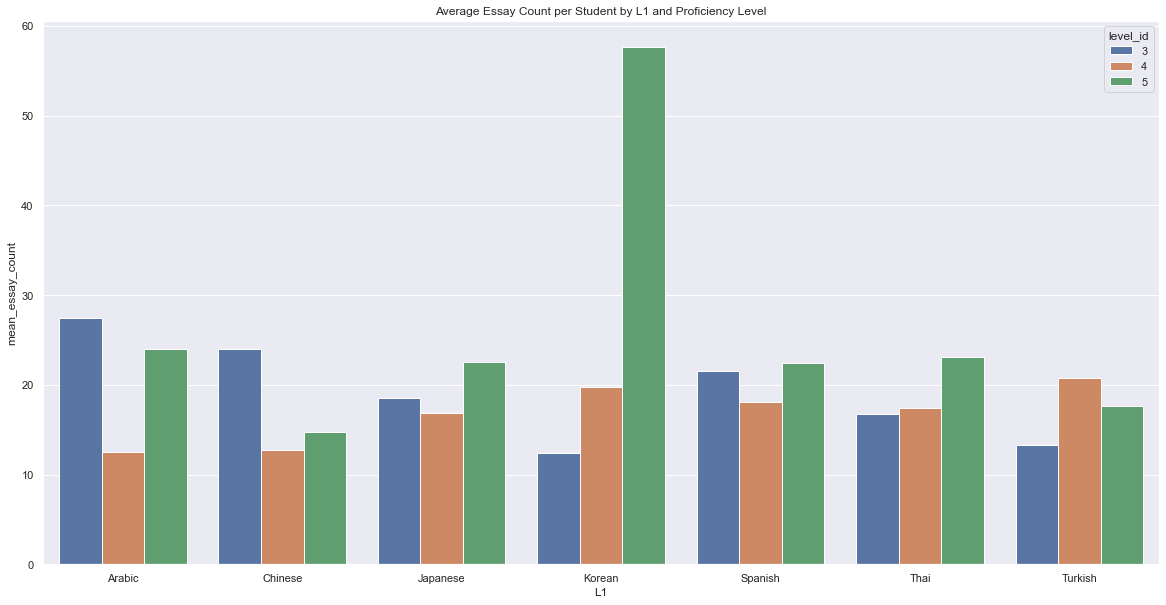

In [6]:
sns.barplot(
    data=L1_level_counts,
    x="L1",
    y="mean_essay_count",
    hue="level_id"
).set(title="Average Essay Count per Student by L1 and Proficiency Level")
plt.show()

That's... really weird.
I have no idea why advanced Korean speakers have so many more essays than any other group.
Could it be because of bad luck with the random sampling?
Or is this a wider trend in the original PELIC dataset?

In [7]:
pelic = pd.read_csv("data/PELIC_compiled.csv")

L1_level_counts_pelic = pelic.groupby(["L1", "level_id"])["anon_id"].nunique().reset_index()
L1_level_counts_pelic.rename(columns={"anon_id": "count"}, inplace=True)
L1_level_counts_pelic = L1_level_counts_pelic[
    L1_level_counts_pelic["L1"].isin(L1_level_counts["L1"]) &
    L1_level_counts_pelic["level_id"].isin(L1_level_counts["level_id"])
]

L1_level_counts_pelic["mean_essay_count"] = [
    len(
        pelic[
            (pelic["L1"] == L1_level_counts_pelic.iloc[i]["L1"]) &
            (pelic["level_id"] == L1_level_counts_pelic.iloc[i]["level_id"])
        ]
    ) / L1_level_counts_pelic.iloc[i]["count"] for i in range(len(L1_level_counts_pelic))
]
L1_level_counts_pelic

,L1,level_id,count,mean_essay_count
1,Arabic,3,244,22.995902
2,Arabic,4,342,17.175439
3,Arabic,5,212,21.358491
7,Chinese,3,86,22.104651
8,Chinese,4,154,19.084416
9,Chinese,5,96,36.635417
33,Japanese,3,21,18.523810
34,Japanese,4,53,22.962264
35,Japanese,5,35,33.600000
37,Korean,3,88,17.613636


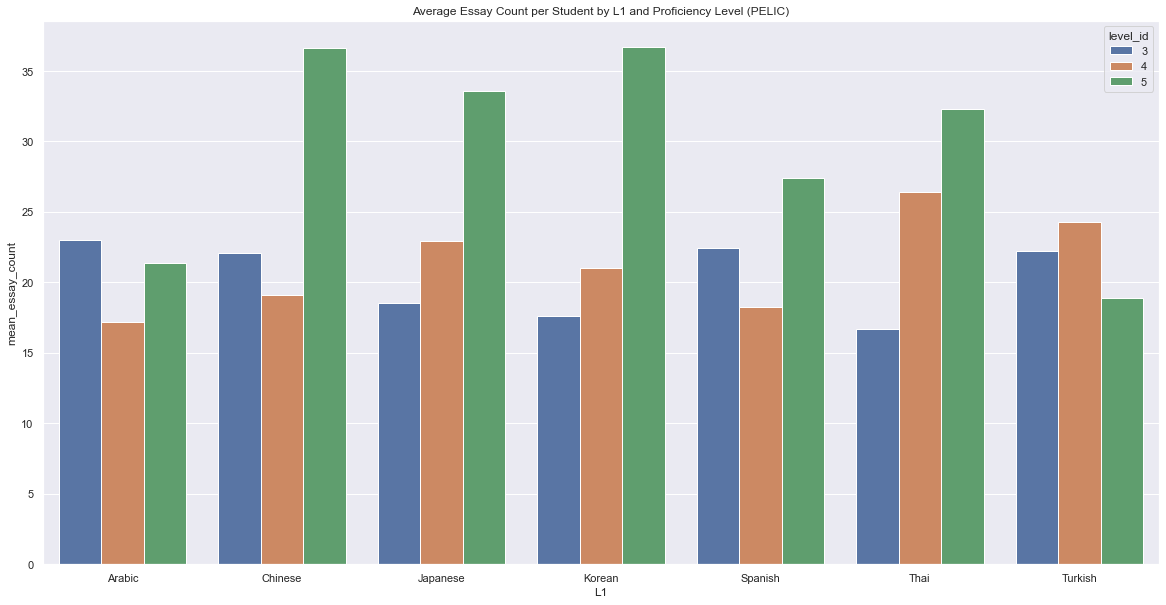

In [8]:
sns.barplot(
    data=L1_level_counts_pelic,
    x="L1",
    y="mean_essay_count",
    hue="level_id"
).set(title="Average Essay Count per Student by L1 and Proficiency Level (PELIC)")
plt.show()

Okay, so it looks like that the distribution of essays isn't nearly as skewed in the original PELIC dataset.
Apparently I just got really unlucky with the random sampling.
Let's check out the distribution of essays for the advanced Korean students in particular just to be sure:

In [9]:
level_counts_korean = taassc_measures[taassc_measures["L1"] == "Korean"]["anon_id"].value_counts().sort_values(ascending=False).reset_index()
level_counts_korean.rename(columns={"index": "anon_id", "anon_id": "count"}, inplace=True)
level_counts_korean

,anon_id,count
0,da3,169
1,fi5,76
2,co5,76
3,gk5,62
4,al5,61
5,ch2,61
6,ay1,60
7,dp5,34
8,fu6,33
9,bq0,32


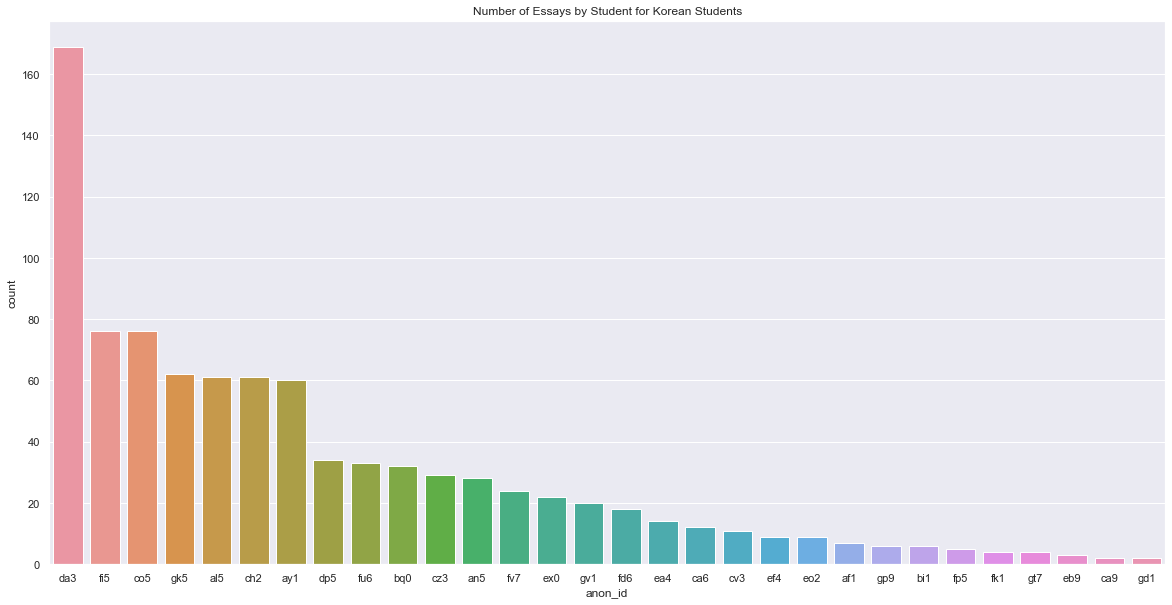

In [10]:
sns.barplot(
    data=level_counts_korean,
    x="anon_id",
    y="count"
).set(title="Number of Essays by Student for Korean Students")
plt.show()

Why does one Korean student have so many more essays than everyone else?
This student has more than twice as many essays as the student with the second-most essays...

Anyway, given that it'd take too long to resample the PELIC data and process it with TAASSC, I don't have much choice but to accept the number of essays from this one Korean student as an outlier.
Hopefully it doesn't affect the results of later analysis in any significant way.

## Analysis of Syntactical Measures by L1


### T-Unit Count per Sentence

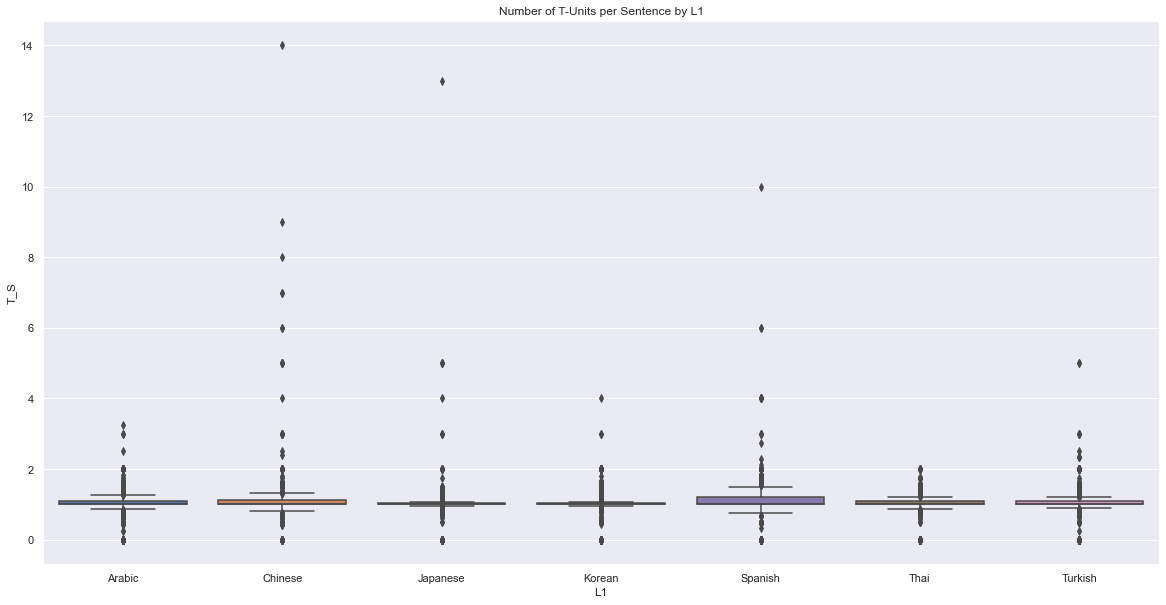

In [11]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="T_S"
).set(title="Number of T-Units per Sentence by L1")
plt.show()

Those are some *really* extreme outliers... TAASSC must've parsed those essays incorrectly.
Let me investigate the 3 most extreme outliers:

In [12]:
# Most extreme outlier with T_S = 14
taassc_measures[(taassc_measures["L1"] == "Chinese") & (taassc_measures["T_S"] == 14)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
3101,10493,fm2,Chinese,3,14.0,9.571429,1.428571,6.7,0.0,0.0


In [13]:
pelic[pelic["answer_id"] == 10493]["text"].iloc[0]

'Pon-ANON_NAME_0 is an island near Taiwan,I went there with my classmates.That was my graduation travel.According to my experience,I think it was the best place to go on a vacation.First of all,we can do many water activiies there,like snorkling and taking a boat,they are very exciting.Second,we can try some dishes which are their traditional foods,the foods were made by local.Third,there are also many good places in Pon-ANON_NAME_0,we can see nature and strange stones,if we go there,we can feel relaxing.The most importantly,there are firework fastival in summer vacation,if we go there on July,we can see fireworks there,they are very wonderful because many pictures like animal and colors in the sky.According to these things,I think the best vacation place is Pon-ANON_NAME_0.'

This essay is completely fine, and there clearly aren't 14 T-units per sentence.

In [14]:
# Second-most extreme outlier with T_S = 13
taassc_measures[(taassc_measures["L1"] == "Japanese") & (taassc_measures["T_S"] == 13)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
2573,47475,dz0,Japanese,4,13.0,19.615385,2.769231,7.083333,0.0,0.0


In [15]:
pelic[pelic["answer_id"] == 47475]["text"].iloc[0]

' Last year,on March 11st,when I woke up,I found that my right leg did not work and I could not stand up.I called my boss and told not to be able to work that day.Around on 3 pm,the earth began to quake suddenly.By the time it ended,I had been staying in my bed.As soon as it had gone,I tried to call 911 or taxi,but it was out of work.I crawled and went out my room, but the elevator was also out of work,so I had to crawled steps.Afterwards,I asked for a man to call 911,but he told me that all cell phones and electricity was not working.I finally got to public phones with crawling;however,there were so many people who were irritated.After waiting for a long time,I called 911,and it told me that all ambulance had been out ,so I needed to wait more than 3 hours.After 3 hours,I rode an ambulance for the first time in my life.I was sent a hospital which was not so far from my home,but it took a long time because of traffic jam.I got a pain relief medicine,but I needed to go back by myself.Th

Same with this essay: there clearly aren't 13 T-units per sentence.

In [16]:
# Third-most extreme outlier with T_S = 10
taassc_measures[(taassc_measures["L1"] == "Spanish") & (taassc_measures["T_S"] == 10)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
4031,22619,cy6,Spanish,4,10.0,8.6,1.5,5.733333,0.235294,0.0


In [17]:
pelic[pelic["answer_id"] == 22619]["text"].iloc[0]

"My partner's name is ANON_NAME_0 ,it doesn't have any meaning in his country and he doesn't have any nickname ; he is from Saudi Arabia ,in his country they used to have a tittle and the tittle that he used is P.T that means Physical Therapist, he is living here 5 months and he is living in Squirrel Hill, he really loves the area, he came here to improve his English he loves do exercises everyday and he will stay here until December."

This one is understandable though, since the entire essay is just one long run-on sentence.

Anyway, let's take a closer look at the bulk of the values:

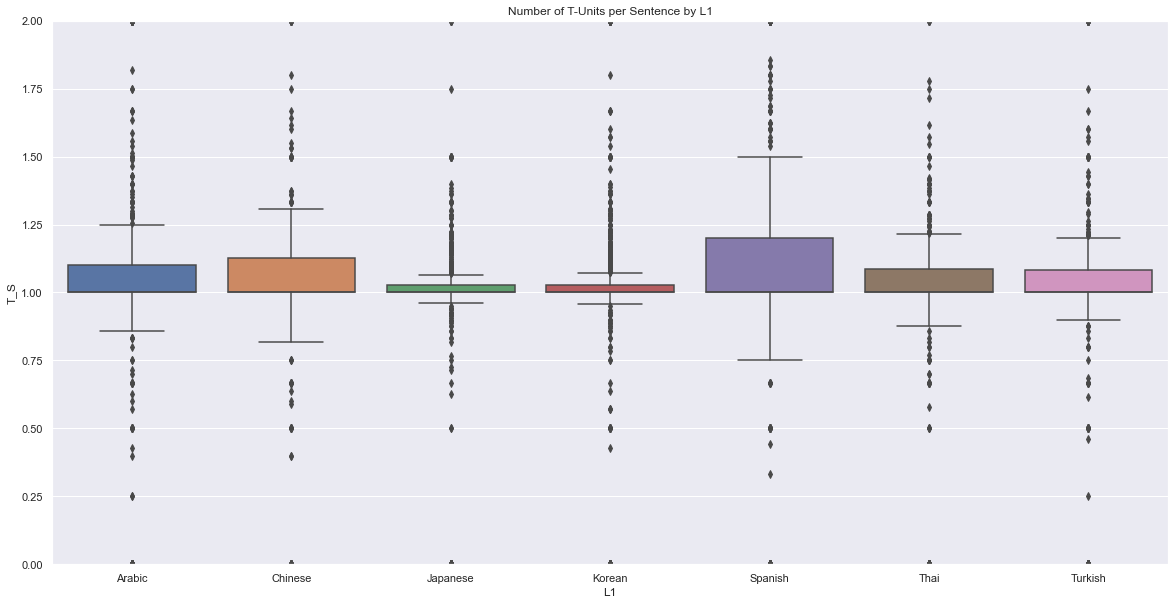

In [18]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="T_S"
).set(title="Number of T-Units per Sentence by L1")
plt.ylim(0, 2)
plt.show()

Here's the same plot broken down by proficiency level as well:

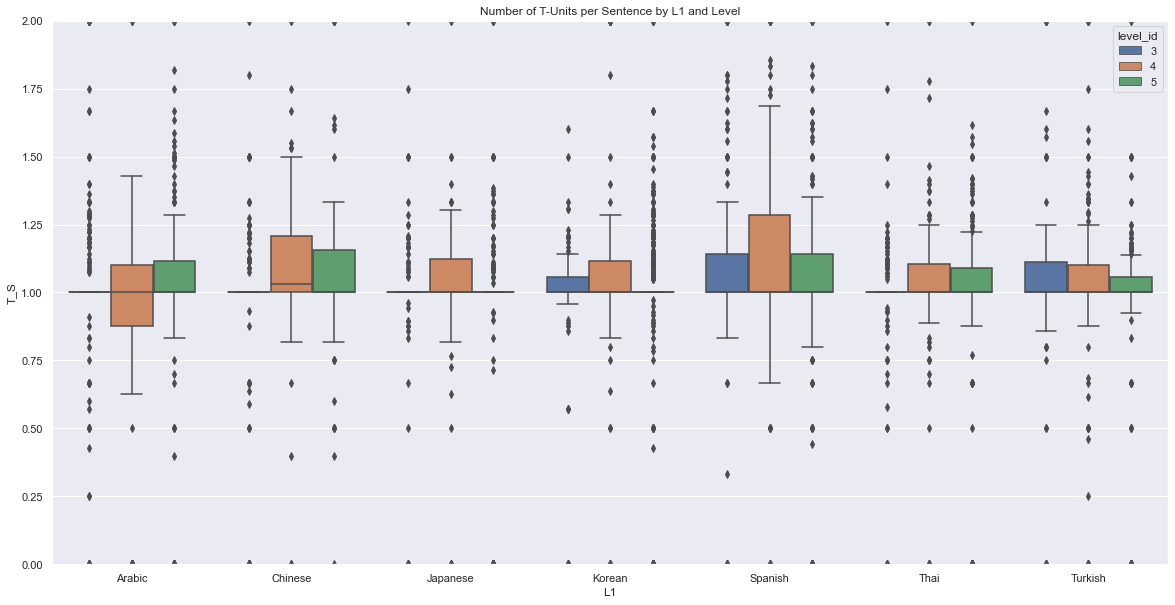

In [19]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="T_S",
    hue="level_id"
).set(title="Number of T-Units per Sentence by L1 and Level")
plt.ylim(0, 2)
plt.show()

### Mean T-Unit Length

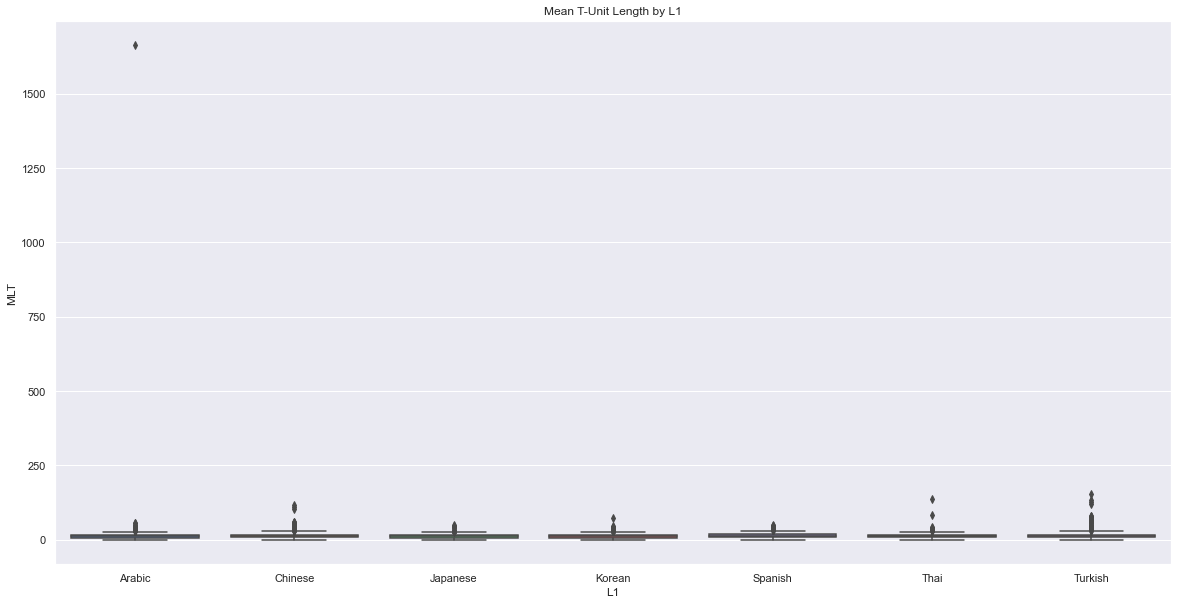

In [20]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLT"
).set(title="Mean T-Unit Length by L1")
plt.show()

Okay, let's investigate the most extreme outlier again:

In [21]:
# Most extreme outlier with MLT > 1500
taassc_measures[(taassc_measures["L1"] == "Arabic") & (taassc_measures["MLT"] > 1500)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
383,2250,gj4,Arabic,5,0.5,1663.0,4.0,415.75,0.5,0.0


In [22]:
pelic[pelic["answer_id"] == 2250]["text"].iloc[0]

' In today¡¯s communities all over the world, smokers are a group that is a part that can not be derived from their societies. Smoking have effects on the society and behaviors in addition to \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Okay, something must've gone *horribly* wrong with this student's essay at some point.
I'm not sure what I can really do about this.

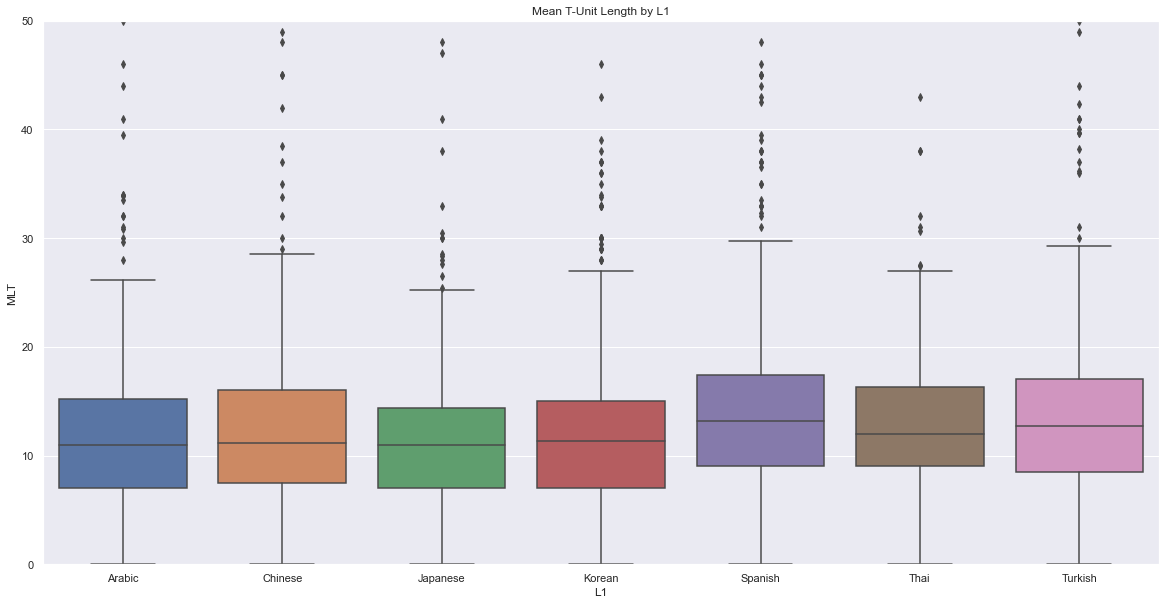

In [23]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLT"
).set(title="Mean T-Unit Length by L1")
plt.ylim(0, 50)
plt.show()

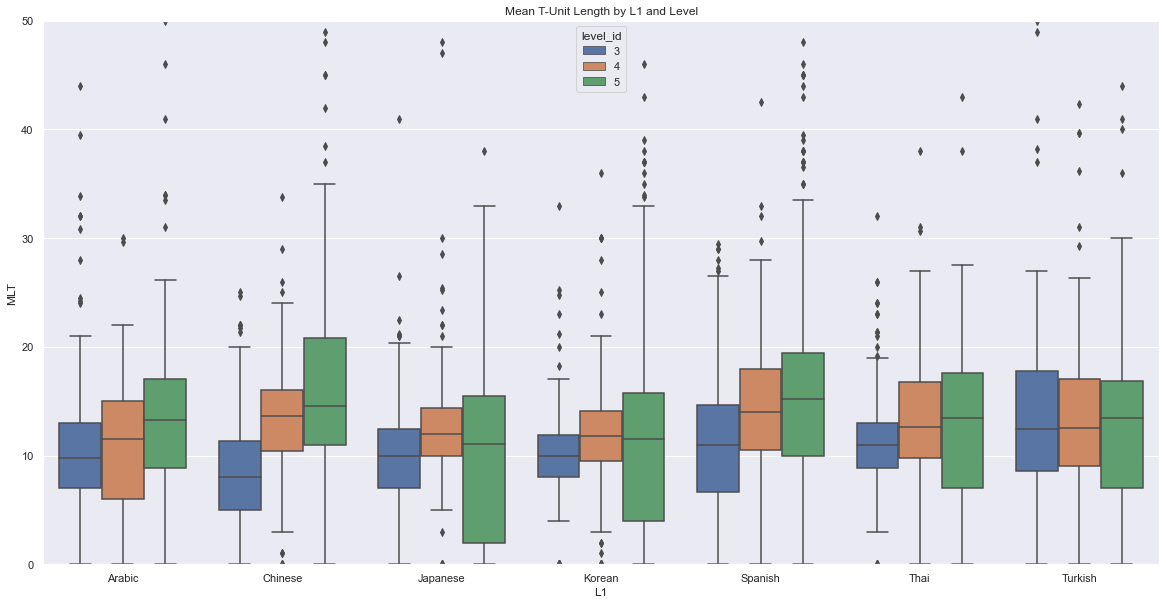

In [24]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLT",
    hue="level_id"
).set(title="Mean T-Unit Length by L1 and Level")
plt.ylim(0, 50)
plt.show()

### Clause Count per T-Unit

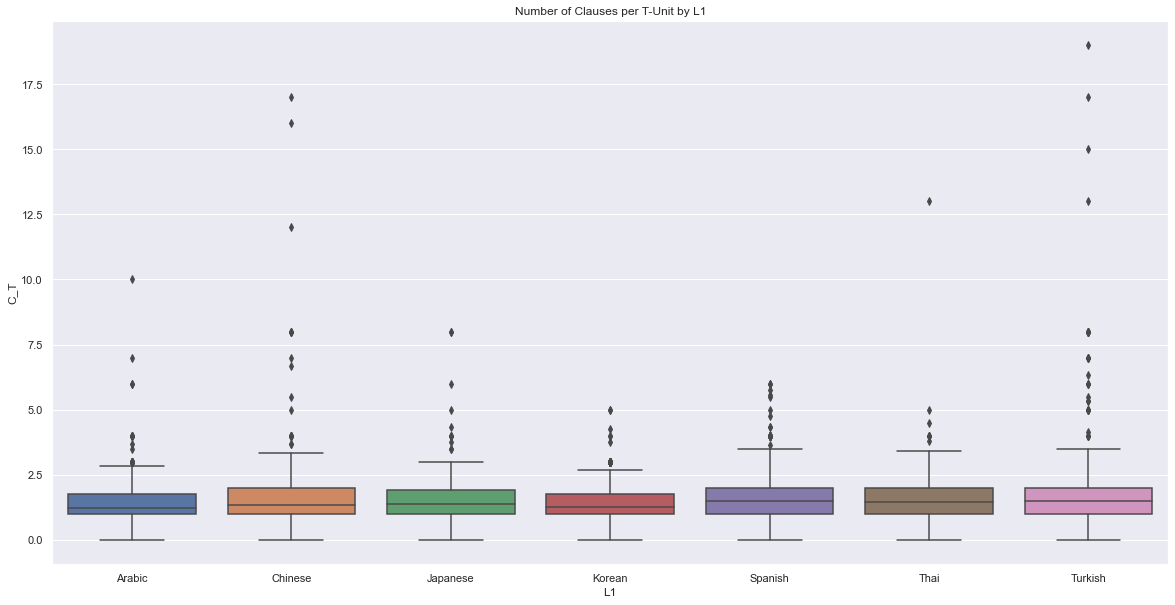

In [25]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="C_T"
).set(title="Number of Clauses per T-Unit by L1")
plt.show()

Once again, let's investigate the most extreme outliers:

In [26]:
taassc_measures[(taassc_measures["L1"] == "Turkish") & (taassc_measures["C_T"] > 17.5)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
4271,22566,bw1,Turkish,3,0.5,152.0,19.0,8.0,0.0,0.0


In [27]:
pelic[pelic["answer_id"] == 22566]["text"].iloc[0]

"BORING WEEKEND\n \n There are a lot of things to do this weekend but Pittsburgh is so cold at these times.First of all I will do my homework on friday night because i don't want to think them anymore.Then I will watch movie in my home.It will be Tim Burton's movie.I am going to sleep on saturday morning until 1 pm.Than I am going to go to Sauth Side to meet my friends.We are going to go to Cheescake Factory.Maybe we can go to Giant Eagle for foods shopping.Probably the weather will be so cold so i will go back to my warm house.Next i will tidy my house.After I will use my computer and i will talk with my family on msn.I don't have any plan on Sunday because the weather is so cold at these days so I am lazy.Finally I love weekends but not in winter time.."

This is a pretty normal essay and definitely doesn't have an absurd number of clauses per T-unit.
Once again, TAASSC must've parsed this one incorrectly...

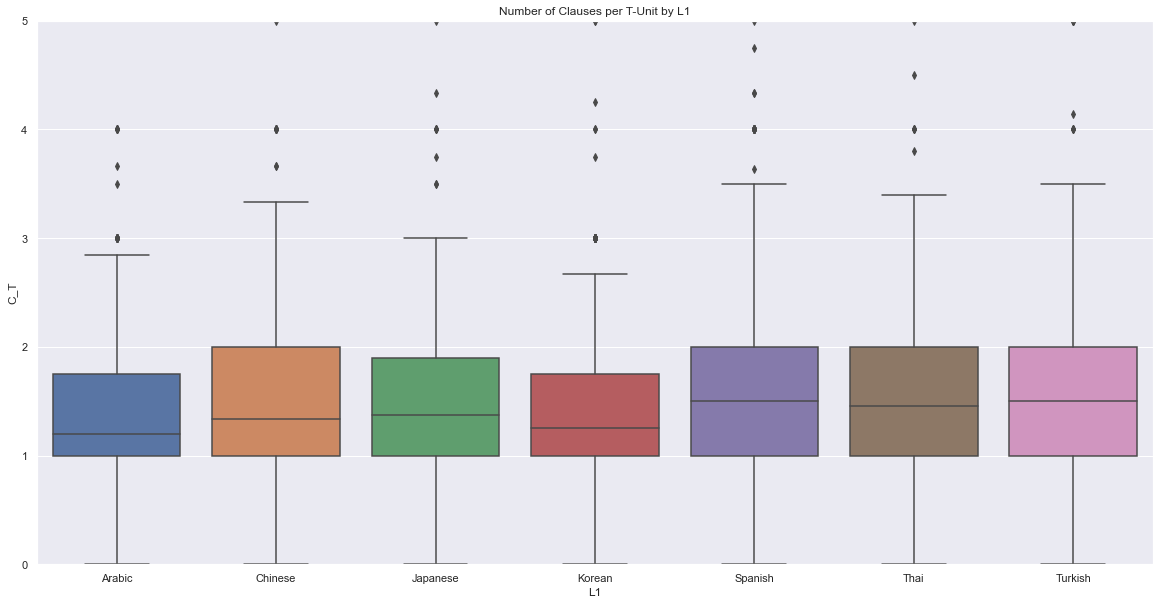

In [28]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="C_T"
).set(title="Number of Clauses per T-Unit by L1")
plt.ylim(0, 5)
plt.show()

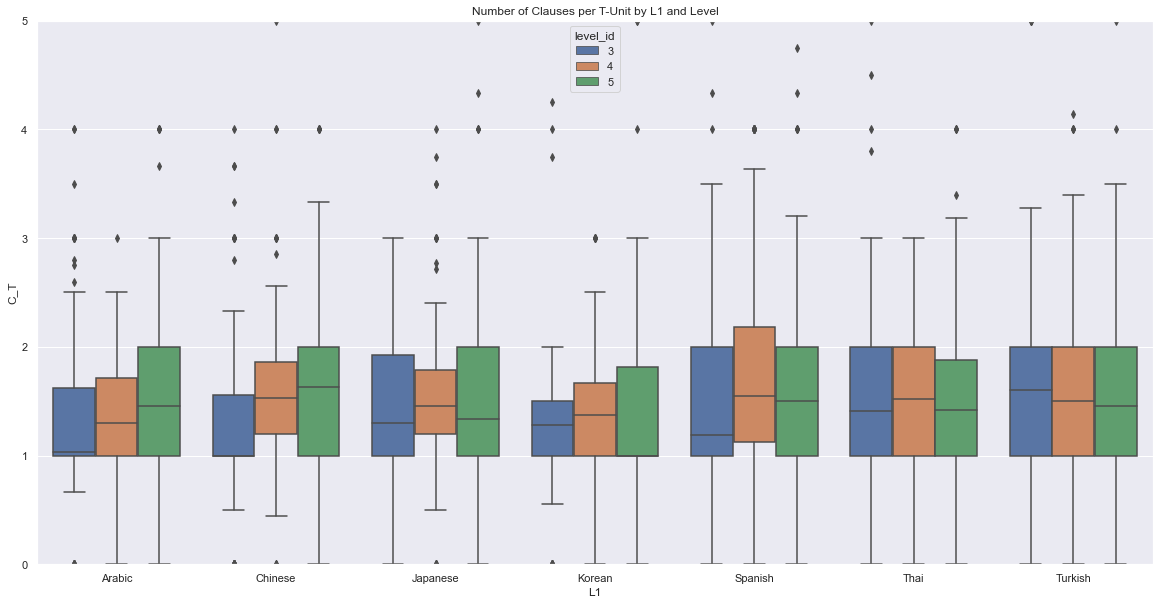

In [29]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="C_T",
    hue="level_id"
).set(title="Number of Clauses per T-Unit by L1 and Level")
plt.ylim(0, 5)
plt.show()

### Mean Clause Length

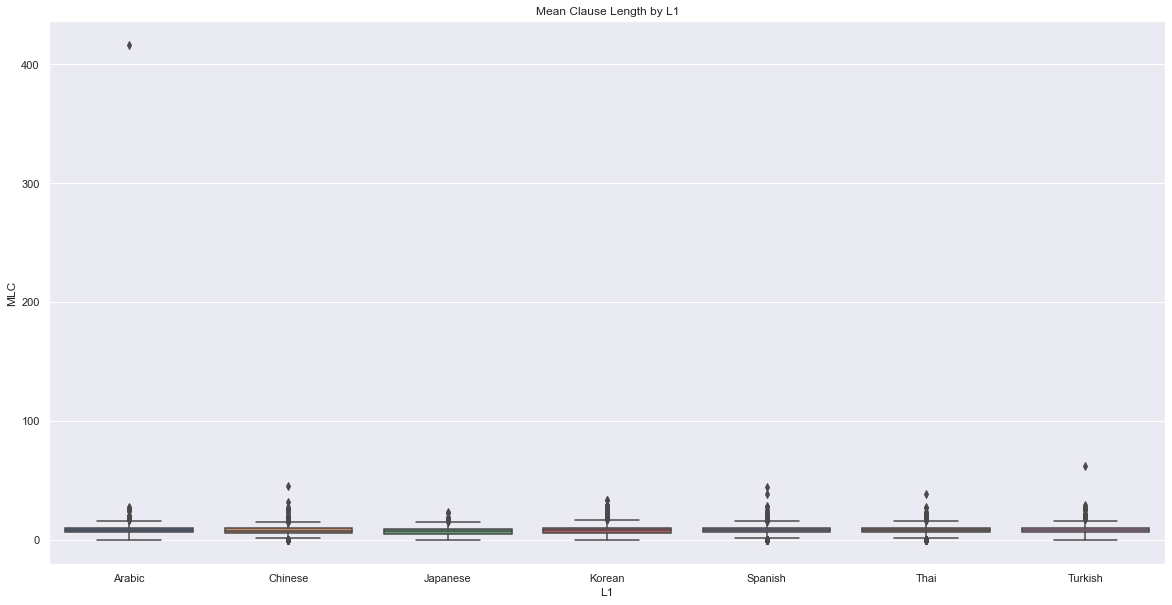

In [30]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLC"
).set(title="Mean Clause Length by L1")
plt.show()

Okay, let's do this again...

In [31]:
taassc_measures[(taassc_measures["L1"] == "Arabic") & (taassc_measures["MLC"] > 400)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
383,2250,gj4,Arabic,5,0.5,1663.0,4.0,415.75,0.5,0.0


In [32]:
pelic[pelic["answer_id"] == 2250]["text"].iloc[0]

' In today¡¯s communities all over the world, smokers are a group that is a part that can not be derived from their societies. Smoking have effects on the society and behaviors in addition to \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Okay, it's *that* essay again.
Again, I'm not sure what I can really do about this.

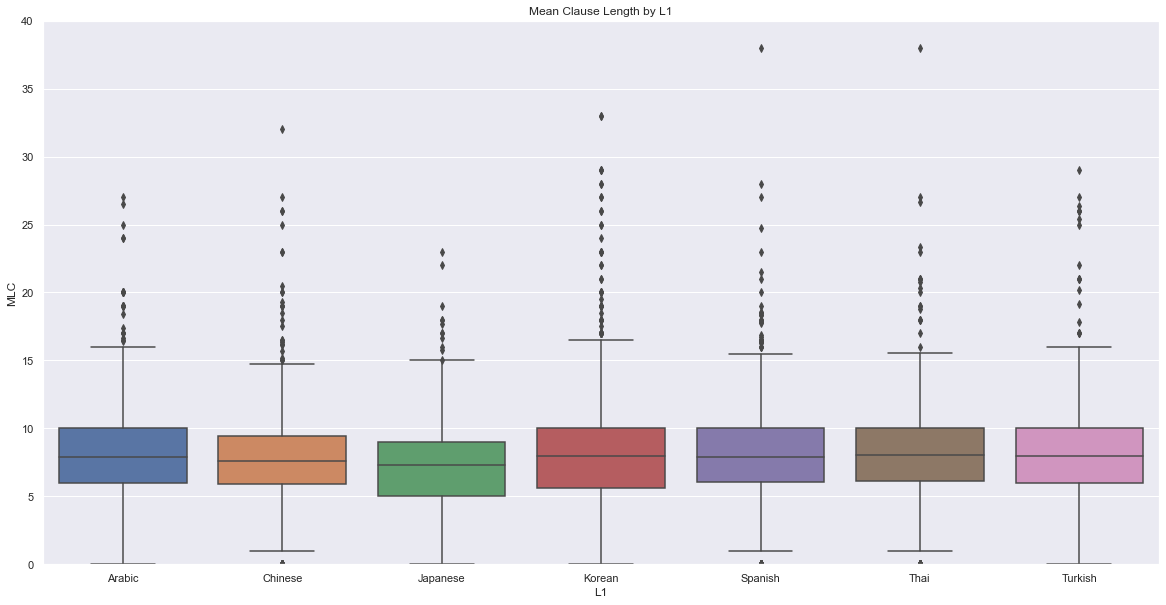

In [33]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLC"
).set(title="Mean Clause Length by L1")
plt.ylim(0, 40)
plt.show()

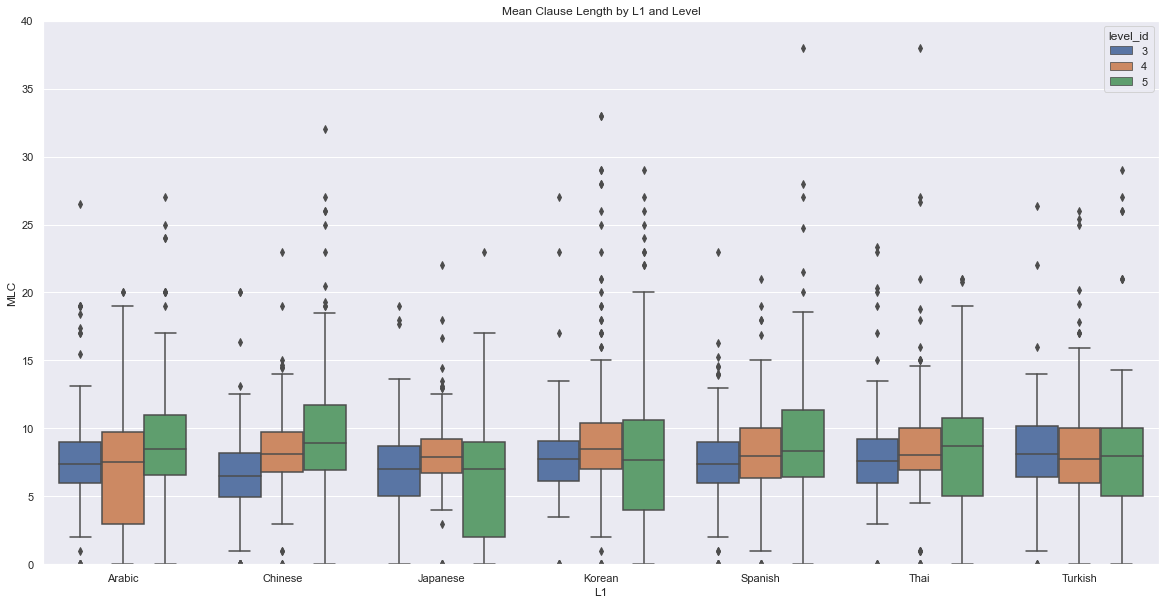

In [34]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLC",
    hue="level_id"
).set(title="Mean Clause Length by L1 and Level")
plt.ylim(0, 40)
plt.show()

### Preposition Count per Clause

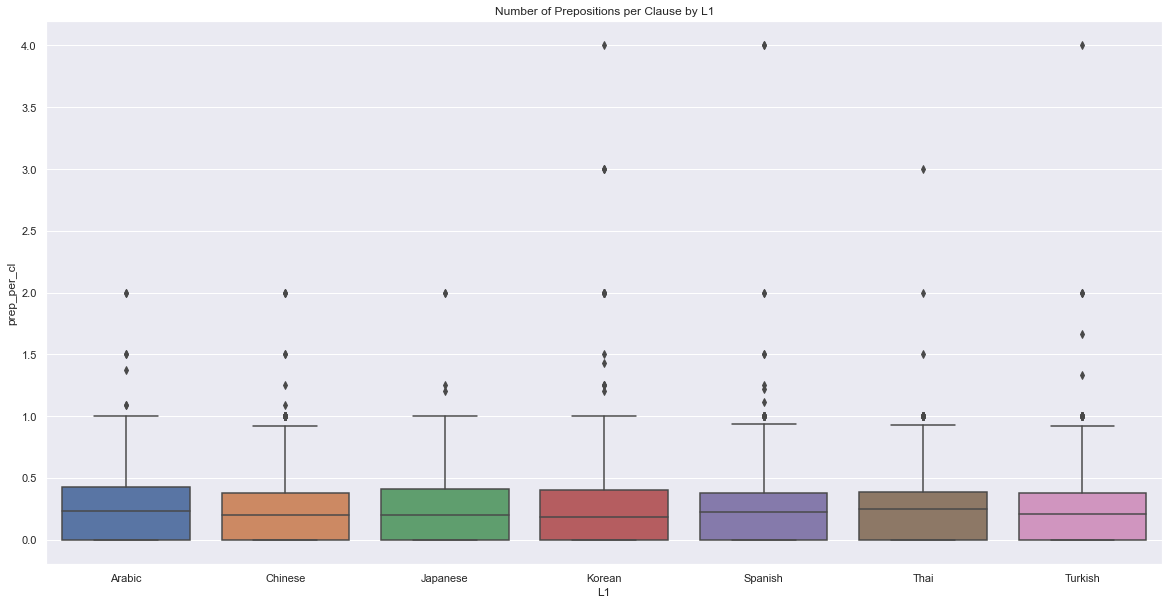

In [35]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="prep_per_cl"
).set(title="Number of Prepositions per Clause by L1")
plt.show()

More extreme outliers:

In [36]:
taassc_measures[(taassc_measures["L1"] == "Korean") & (taassc_measures["prep_per_cl"] == 4)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
1027,16072,da3,Korean,5,1.0,10.0,1.0,10.0,4.0,0.0


In [37]:
pelic[pelic["answer_id"] == 16072]["text"].iloc[0]

'Stereotypes could lead to prejudice, discrimation, persecution or even genocide. '

There's only 1 preposition in this essay (and also only 1 clause), so I'm not sure how TAASSC managed to count 4 prepositions per clause.

In [38]:
taassc_measures[(taassc_measures["L1"] == "Spanish") & (taassc_measures["prep_per_cl"] == 4)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
3848,16203,dk0,Spanish,5,1.0,14.0,1.0,14.0,4.0,0.0
4093,21623,eo8,Spanish,5,1.0,28.0,1.0,28.0,4.0,0.0


In [39]:
pelic[pelic["answer_id"] == 16203]["text"].iloc[0]

'According to the author, improper stereotypes contribute to prejudice, discrimination, persecution or even genocide. '

Once again, this looks perfectly fine to me, and there definitely aren't 4 prepositions per clause.

In [40]:
pelic[pelic["answer_id"] == 21623]["text"].iloc[0]

"Dr. Dirkmaat's graduate students assembled the framework of a single male skeleton with a partial skull, ribs, vertebrae and bones of the arms, legs, hands and feet"

This one is also fine.

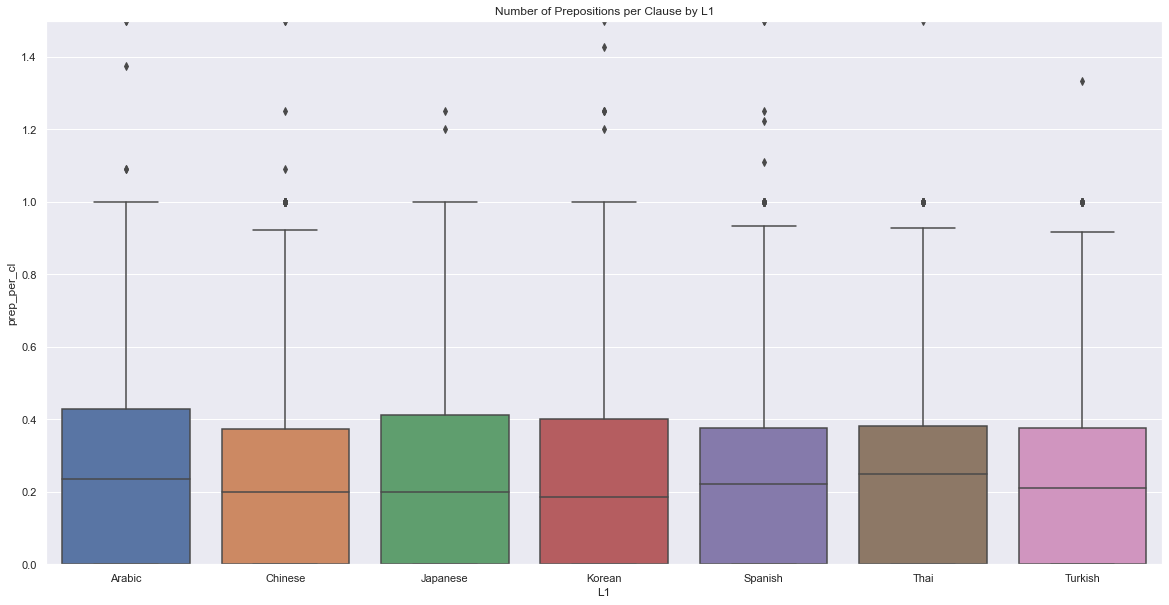

In [41]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="prep_per_cl"
).set(title="Number of Prepositions per Clause by L1")
plt.ylim(0, 1.5)
plt.show()

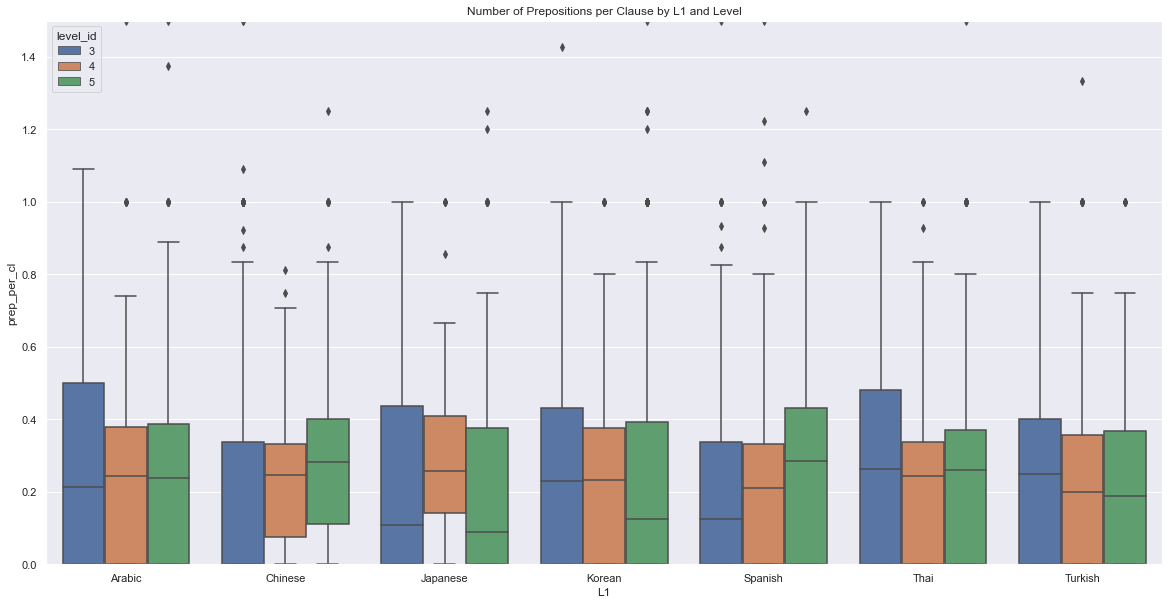

In [42]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="prep_per_cl",
    hue="level_id"
).set(title="Number of Prepositions per Clause by L1 and Level")
plt.ylim(0, 1.5)
plt.show()

### Subordinating Conjunction Count per Clause

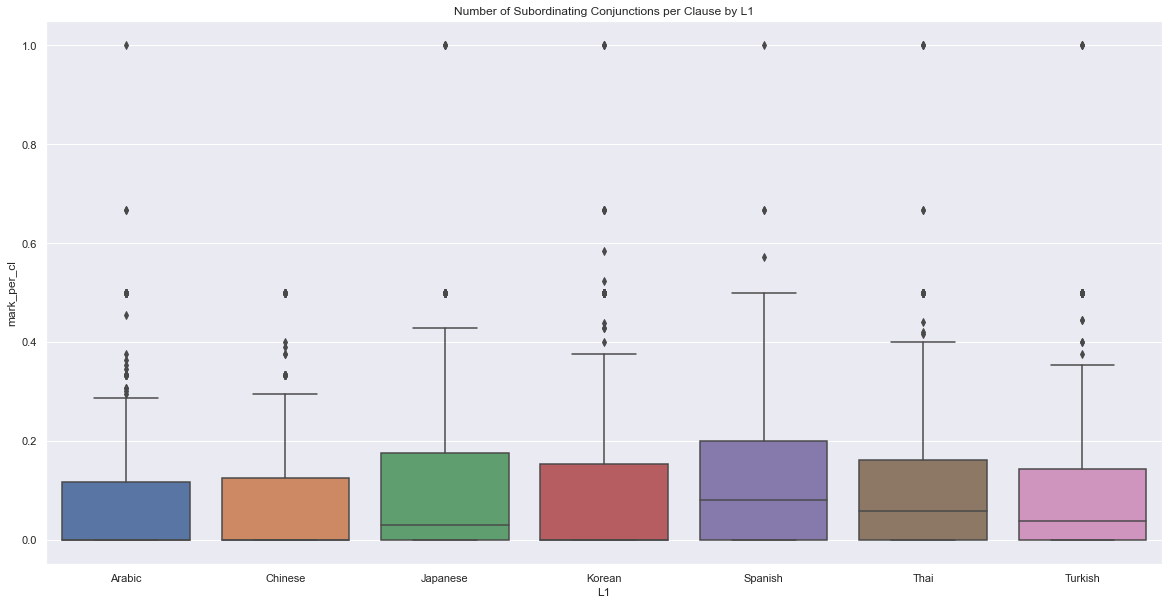

In [43]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="mark_per_cl"
).set(title="Number of Subordinating Conjunctions per Clause by L1")
plt.show()

More outliers...

In [44]:
taassc_measures[(taassc_measures["L1"] == "Arabic") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
109,14853,co0,Arabic,5,1.0,9.0,1.0,9.0,1.0,1.0


In [45]:
pelic[pelic["answer_id"] == 14853]["text"].iloc[0]

'And in the future, that GAP will probably INCREASE.'

There aren't any subordinating conjunctions in this essay, though...
I'm not sure how TAASSC got 1 subordinating conjunction per clause...

In [46]:
taassc_measures[(taassc_measures["L1"] == "Japanese") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
502,25148,hb2,Japanese,3,1.0,6.0,1.0,6.0,0.0,1.0
2518,25146,hb2,Japanese,3,1.0,8.0,1.0,8.0,0.0,1.0
2825,25147,hb2,Japanese,3,1.0,11.0,1.0,11.0,1.0,1.0
2438,15864,fh9,Japanese,5,1.0,9.0,1.0,9.0,0.0,1.0


In [47]:
pelic[pelic["answer_id"] == 25148]["text"].iloc[0]

'Because lower level is more dirty.'

This one was correct to have been assigned 1 subordinating conjunction per clause.

In [48]:
pelic[pelic["answer_id"] == 25146]["text"].iloc[0]

'Because the Cathedral is gothic,and Roman autentic.'

Same with this one.

In [49]:
pelic[pelic["answer_id"] == 25147]["text"].iloc[0]

'Because Pittsburgh is dedicaterd with area that success of air polution.'

This one is incorrect since there are 2 subordinating conjunctions.

In [50]:
pelic[pelic["answer_id"] == 15864]["text"].iloc[0]

'Because the growing population of urban poor threated them.'

This one is correct too.

In [51]:
taassc_measures[(taassc_measures["L1"] == "Korean") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
364,27461,al5,Korean,5,1.0,5.0,1.0,5.0,0.0,1.0
1069,27107,bq0,Korean,5,0.0,0.0,0.0,9.0,1.0,1.0
2293,27108,bq0,Korean,5,0.0,0.0,0.0,7.0,0.0,1.0


In [52]:
pelic[pelic["answer_id"] == 27461]["text"].iloc[0]

'because I was so sick.'

In [53]:
pelic[pelic["answer_id"] == 27107]["text"].iloc[0]

'While the baseball game is playing in the park,'

In [54]:
pelic[pelic["answer_id"] == 27108]["text"].iloc[0]

"because Monday was my mother's birthday"

These are all correct too.

In [55]:
taassc_measures[(taassc_measures["L1"] == "Spanish") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
2447,27831,ch0,Spanish,3,0.0,0.0,0.0,14.0,0.5,1.0


In [56]:
pelic[pelic["answer_id"] == 27831]["text"].iloc[0]

'Because the people needs a situation clear for undersand that to tell to them '

I'm not sure if this one is correct because I can't tell if "that" is being used as a complementizer or a demonstrative here.

In [57]:
taassc_measures[(taassc_measures["L1"] == "Thai") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
1103,24953,ci6,Thai,4,1.0,22.0,2.0,11.0,0.0,1.0
1247,13842,eu0,Thai,5,0.0,0.0,0.0,5.0,0.0,1.0
2964,14837,eu0,Thai,5,1.0,9.0,1.0,9.0,1.0,1.0


In [58]:
pelic[pelic["answer_id"] == 24953]["text"].iloc[0]

'phenomenon\nSome situation of the national that the science can not explain a phenomenon because the science can not fine the reason. '

This one is also correct... I think (it's kind of hard to tell with the line break).

In [59]:
taassc_measures[(taassc_measures["L1"] == "Turkish") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
2280,15458,em0,Turkish,5,0.0,0.0,0.0,5.0,0.0,1.0
2582,28341,an1,Turkish,5,1.0,17.0,2.0,8.5,0.0,1.0
3265,15833,bs8,Turkish,5,1.0,9.0,1.0,9.0,1.0,1.0


In [60]:
pelic[pelic["answer_id"] == 15458]["text"].iloc[0]

'that area had been catostrophe'

This one is definitely incorrect since there are no subordinating conjunctions.

In [61]:
pelic[pelic["answer_id"] == 28341]["text"].iloc[0]

"Plagiarism is the use of another's original words or ideas as though they were your own."

This one is correct.

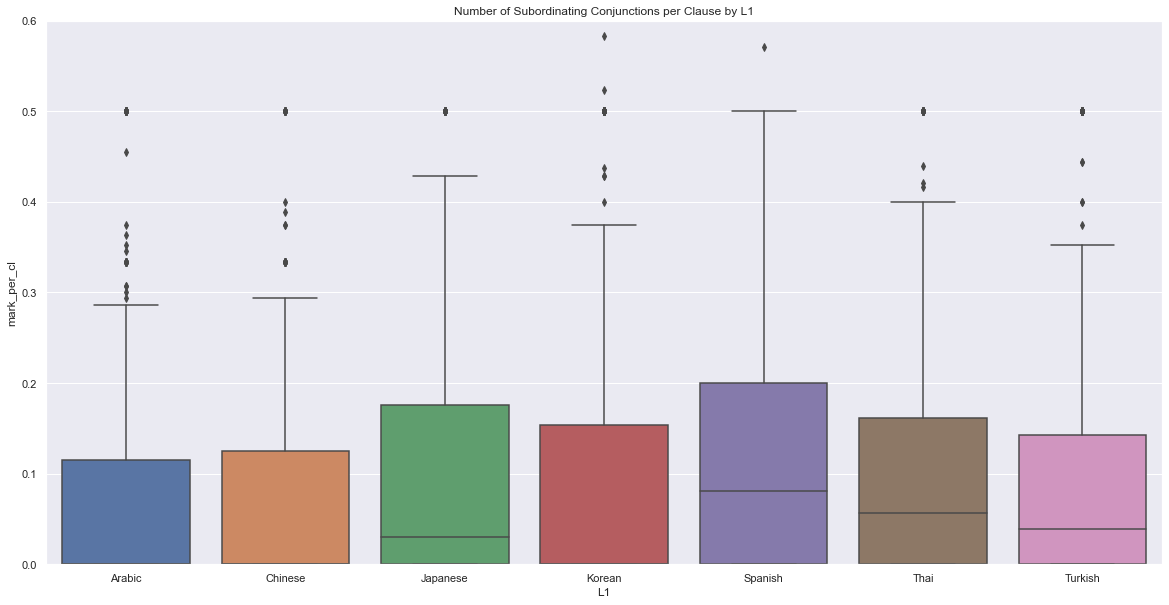

In [62]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="mark_per_cl"
).set(title="Number of Subordinating Conjunctions per Clause by L1")
plt.ylim(0, 0.6)
plt.show()

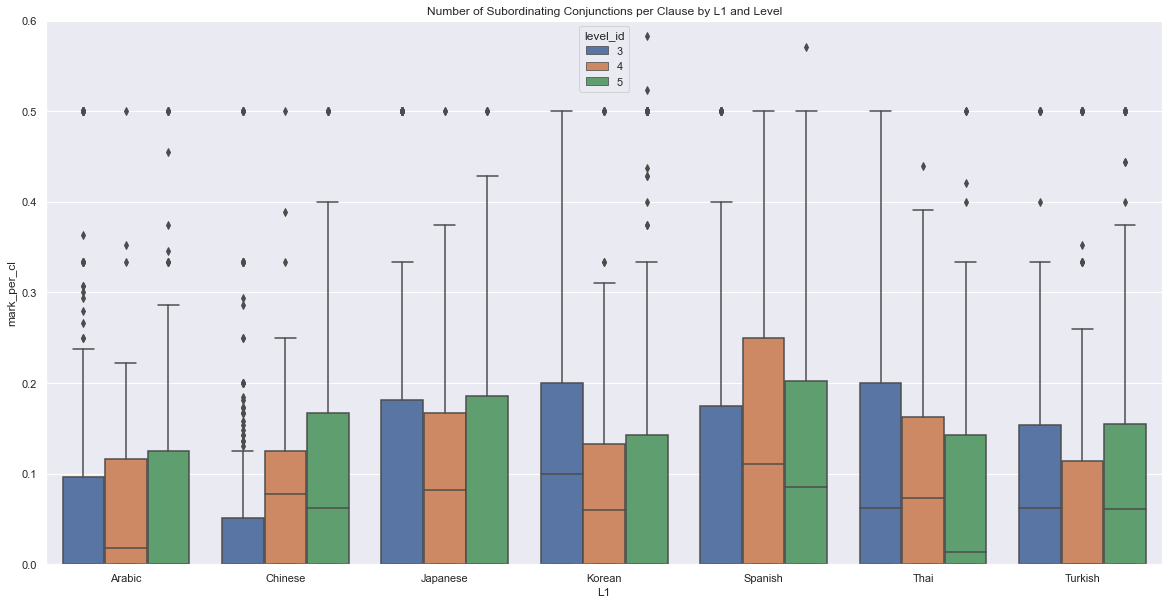

In [63]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="mark_per_cl",
    hue="level_id"
).set(title="Number of Subordinating Conjunctions per Clause by L1 and Level")
plt.ylim(0, 0.6)
plt.show()

## Conclusion

Instead of actually performing some statistical analysis on the TAASSC syntactic measures as I had planned, I ended up investigating the numerous outliers in the data.
It turns out that the majority were incorrectly calculated by TAASSC and definitely shouldn't have been outliers.
Given that I had only investigated the most *extreme* outliers, it's very likely that the remaining essays, both non-outliers and less extreme outliers, have the same kinds of miscalculations that could really influence the distributions of the measures.
I'm very torn as to how I should continue from here, as at this point I have little confidence in the accuracy of the TAASSC syntactic measures.
I don't think I can in good conscience perform statistical analyses and draw conclusions from this data when I'm well aware that the data is inaccurate.